In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import os

sns.set_style('dark')

%load_ext autotime
%matplotlib inline

FILE = "MISO.csv"
DIRI = "data"
MAX_K = 50

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.02 ms


In [239]:
file_path = os.path.join(DIRI, FILE)
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_time             43848 non-null  object
 1   raw demand (MW)       43848 non-null  object
 2   category              43848 non-null  object
 3   cleaned demand (MW)   43848 non-null  int64 
 4   forecast demand (MW)  43848 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
time: 120 ms


In [240]:
df

,date_time,raw demand (MW),category,cleaned demand (MW),forecast demand (MW)
0,2015-07-02 00:00:00,87106,OKAY,87106,93085
1,2015-07-02 01:00:00,85142,OKAY,85142,90381
2,2015-07-02 02:00:00,84173,OKAY,84173,88967
3,2015-07-02 03:00:00,82404,OKAY,82404,86413
4,2015-07-02 04:00:00,77086,OKAY,77086,80579
...,...,...,...,...,...
43843,2020-07-01 19:00:00,101663,OKAY,101663,106973
43844,2020-07-01 20:00:00,102954,OKAY,102954,108987
43845,2020-07-01 21:00:00,103775,OKAY,103775,110336
43846,2020-07-01 22:00:00,104056,OKAY,104056,111058


time: 20 ms


In [241]:
df["date_time"] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')
df["date"] = df["date_time"].dt.date
df["hour"] = df["date_time"].dt.hour
df

,date_time,raw demand (MW),category,cleaned demand (MW),forecast demand (MW),date,hour
0,2015-07-02 00:00:00,87106,OKAY,87106,93085,2015-07-02,0
1,2015-07-02 01:00:00,85142,OKAY,85142,90381,2015-07-02,1
2,2015-07-02 02:00:00,84173,OKAY,84173,88967,2015-07-02,2
3,2015-07-02 03:00:00,82404,OKAY,82404,86413,2015-07-02,3
4,2015-07-02 04:00:00,77086,OKAY,77086,80579,2015-07-02,4
...,...,...,...,...,...,...,...
43843,2020-07-01 19:00:00,101663,OKAY,101663,106973,2020-07-01,19
43844,2020-07-01 20:00:00,102954,OKAY,102954,108987,2020-07-01,20
43845,2020-07-01 21:00:00,103775,OKAY,103775,110336,2020-07-01,21
43846,2020-07-01 22:00:00,104056,OKAY,104056,111058,2020-07-01,22


time: 91.6 ms


In [242]:
df_dropped = df.drop(["raw demand (MW)", "category", "forecast demand (MW)", "date_time"], axis=1)
dfp = df_dropped.pivot(index = "date", columns = "hour", values = "cleaned demand (MW)")
dfp

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-07-02,87106,85142,84173,82404,77086,71479,67323,64587,62873,62138,...,76123,78943,81634,83930,86153,88073,89456,90025,89977,88840
2015-07-03,86617,84035,82697,80747,75547,69890,65701,62852,60966,59757,...,69386,73575,76766,79045,80973,82617,83892,84849,85395,84955
2015-07-04,83036,80300,78827,77143,73104,68519,64265,61292,59282,58046,...,65163,69930,73838,76903,78837,80112,81067,81992,82468,82044
2015-07-05,80122,77235,75163,73266,70980,67902,63897,60809,58759,57506,...,65280,70697,75485,79724,83357,86119,88217,89997,91034,90976
2015-07-06,89452,87034,85840,83864,78545,72845,68584,65545,63804,63297,...,82152,86928,91549,95720,99066,101417,102825,103393,103568,102585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,92775,90158,87435,84779,80241,75376,71881,68623,66457,65049,...,70598,74987,78882,82403,85428,87714,89482,90820,92175,92660
2020-06-28,91528,88612,85261,82431,78280,73872,70150,66795,64446,62600,...,68517,73430,78632,83308,87021,89960,92379,94583,96385,97033
2020-06-29,95663,92461,89116,86268,81981,77225,73136,69493,67667,66837,...,81965,86656,91145,95283,98608,100928,102091,102233,102332,101735


time: 59.1 ms



k =  3 
Cluster Magnitude =  1076272830177.9565 
Cluster Sizes =  [647, 823, 357]

k =  4 
Cluster Magnitude =  855482317569.5038 
Cluster Sizes =  [457, 709, 304, 357]

k =  5 
Cluster Magnitude =  666418190416.8835 
Cluster Sizes =  [344, 234, 317, 676, 256]

k =  6 
Cluster Magnitude =  572382323341.1466 
Cluster Sizes =  [426, 300, 226, 231, 146, 498]

k =  7 
Cluster Magnitude =  488419418822.0329 
Cluster Sizes =  [252, 286, 166, 240, 120, 217, 546]

k =  8 
Cluster Magnitude =  437271663559.89716 
Cluster Sizes =  [209, 468, 154, 181, 283, 114, 230, 188]

k =  9 
Cluster Magnitude =  398478329568.29065 
Cluster Sizes =  [181, 213, 261, 153, 204, 180, 178, 65, 392]

k =  10 
Cluster Magnitude =  370848988093.0446 
Cluster Sizes =  [179, 319, 176, 139, 210, 204, 47, 145, 262, 146]

k =  11 
Cluster Magnitude =  348502467939.8154 
Cluster Sizes =  [207, 252, 32, 173, 148, 176, 223, 105, 182, 206, 123]

k =  12 
Cluster Magnitude =  323666741708.4183 
Cluster Sizes =  [160, 155, 19

Text(0.5, 1.0, 'Cluster Magnitudes for Number of Clusters')

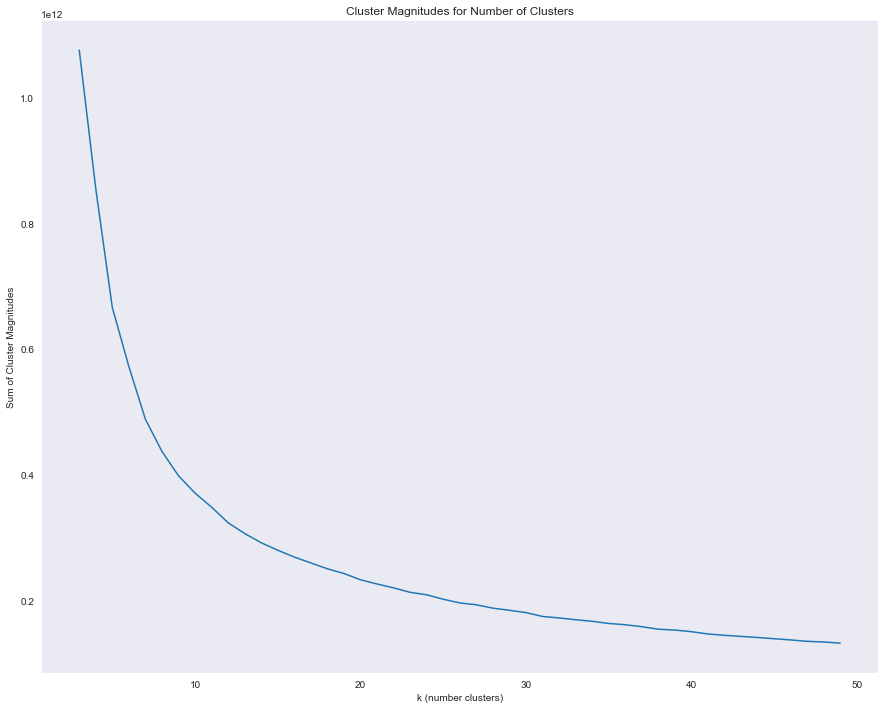

time: 20.6 s


In [243]:
# .inertia_ returns the sum of squared distances of samples to their closest cluster center
# .cluster_centers_  returns array wuth coordinates of cluster centers
# .labels_ returns the cluster label of each example in order

cluster_magn = pd.DataFrame(index=range(3, MAX_K), columns=["Magnitude"])

for k in cluster_magn.index:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dfp)
    clusters = kmeans.labels_
    cluster_magn["Magnitude"][k] = kmeans.inertia_
    
    cluster_sizes = []
    for i in range(k):
        cluster_sizes.append(len(np.where(clusters == i)[0]))
    
    print("\nk = ", k, "\nCluster Magnitude = ", kmeans.inertia_, "\nCluster Sizes = ", cluster_sizes)
    
plt.figure(figsize=(15, 12))
plt.plot(cluster_magn)
plt.xlabel("k (number clusters)")
plt.ylabel("Sum of Cluster Magnitudes")
plt.title("Cluster Magnitudes for Number of Clusters")

In [232]:
# Choosing k=12 because this is the apparent point where increasing clusters only has marginal benefits
# Research paper suggests using a k that results in small groups
kmeans = KMeans(n_clusters=40, random_state=0).fit(dfp)

df_stats = pd.DataFrame()

dfp["peak_load"] = dfp.max(axis=1)
dfp["profile_cluster"] = kmeans.labels_
dfp["cluster_peak"] = dfp.groupby("profile_cluster")["peak_load"].transform(np.max)

df_stats = dfp[["peak_load", "profile_cluster", "cluster_peak"]]
dfp.drop(["peak_load", "profile_cluster", "cluster_peak"], axis=1, inplace=True)

df_stats

hour,peak_load,profile_cluster,cluster_peak
date,,,
2015-07-02,90025,21,99220
2015-07-03,86617,36,94174
2015-07-04,83036,24,91034
2015-07-05,91034,24,91034
2015-07-06,103568,25,111063
...,...,...,...
2020-06-27,92775,6,100171
2020-06-28,97033,6,100171
2020-06-29,102332,25,111063


time: 664 ms


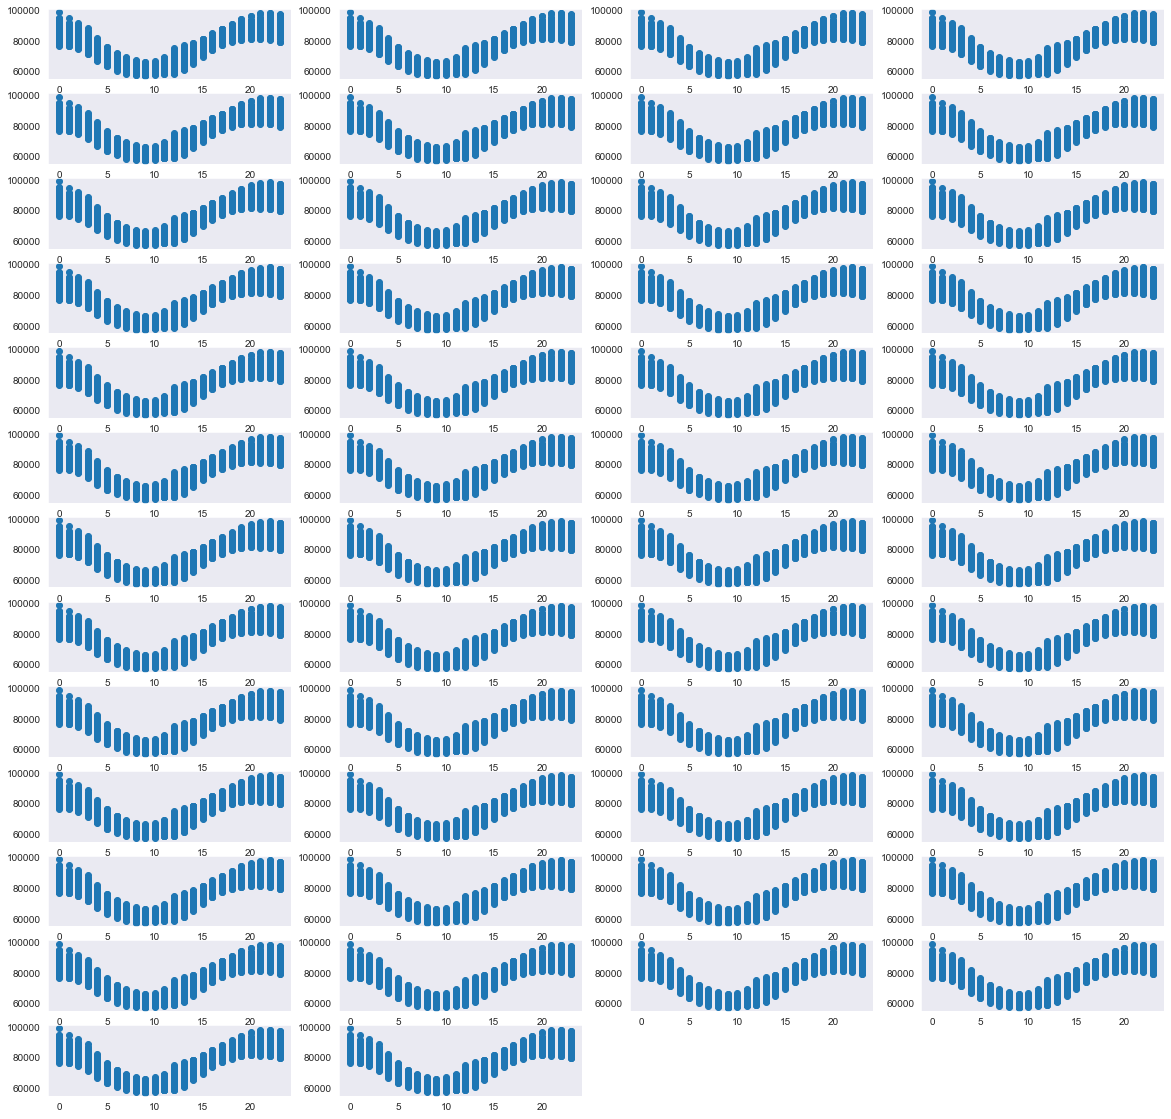

time: 10.3 s


In [244]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize = (20, 20))
gs = GridSpec(MAX_K//4 + 1, 4, figure=fig)

for k in range(MAX_K):
    dfri = dfp.loc[df_stats["profile_cluster"] == k].reset_index()
    dfrim = dfri1.melt(id_vars="date")
    fig.add_subplot(gs[k]).scatter(dfrim["hour"], dfrim["value"])

C:\Users\jimpg\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


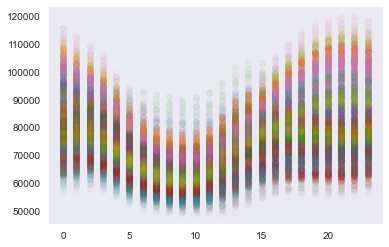

time: 1.3 s


In [245]:
dfpri = dfp.reset_index()
dfpri["clusters"] = kmeans.labels_


for k in range(MAX_K):
    dfpri_k = dfpri.loc[dfpri["clusters"] == k]
    dfpri_k.drop("clusters", axis=1, inplace=True)
    dfprim_k = dfpri_k.melt(id_vars="date")
    plt.scatter(x = dfprim_k["hour"], y = dfprim_k["value"], alpha=0.03)

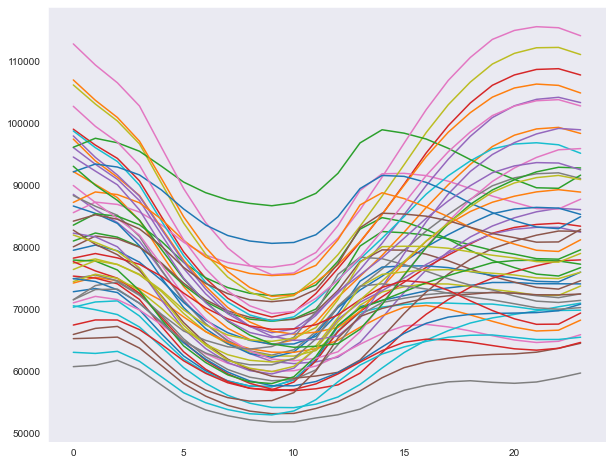

time: 344 ms


In [256]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids = centroids.T

plt.figure(figsize=(10,8))
plt.plot(centroids[0:24])

Let's figure out what kind of day each cluster represents.

In [247]:
df_dropped = df.drop(["raw demand (MW)", "category", "forecast demand (MW)"], axis=1)
df_date = df_dropped.pivot(index = "date", columns = "hour", values = ["cleaned demand (MW)", "date_time"])
df_date.columns

for i in range(1, 24):
    df_date.drop(('date_time', i), axis=1, inplace=True)
df_date.columns

MultiIndex([('cleaned demand (MW)',  0),
            ('cleaned demand (MW)',  1),
            ('cleaned demand (MW)',  2),
            ('cleaned demand (MW)',  3),
            ('cleaned demand (MW)',  4),
            ('cleaned demand (MW)',  5),
            ('cleaned demand (MW)',  6),
            ('cleaned demand (MW)',  7),
            ('cleaned demand (MW)',  8),
            ('cleaned demand (MW)',  9),
            ('cleaned demand (MW)', 10),
            ('cleaned demand (MW)', 11),
            ('cleaned demand (MW)', 12),
            ('cleaned demand (MW)', 13),
            ('cleaned demand (MW)', 14),
            ('cleaned demand (MW)', 15),
            ('cleaned demand (MW)', 16),
            ('cleaned demand (MW)', 17),
            ('cleaned demand (MW)', 18),
            ('cleaned demand (MW)', 19),
            ('cleaned demand (MW)', 20),
            ('cleaned demand (MW)', 21),
            ('cleaned demand (MW)', 22),
            ('cleaned demand (MW)', 23),
            (   

time: 317 ms


In [248]:
# NOTE: 1 = WINTER, 2 = SPRING, 3 = SUMMER, 4 = FALL
df_date["weekday"] = df_date[("date_time", 0)].dt.dayofweek
df_date["season"] = df_date[("date_time", 0)].dt.month%12 // 3 + 1
df_date["cluster"] = kmeans.labels_

df_clusters = df_date[["cluster", "weekday", "season"]]
df_clusters.columns = ["cluster", "weekday", "season"]

for k in range(MAX_K):
    dfk = df_clusters.loc[df_clusters["cluster"] == k]
    print(dfk.value_counts())

cluster  weekday  season
0        1        2         12
         3        2          9
         4        4          9
         0        1          8
                  4          7
         1        4          7
         2        2          6
                  4          5
         3        4          5
         4        2          4
         0        2          2
dtype: int64
cluster  weekday  season
1        3        3         8
         0        3         5
         1        4         5
                  3         4
         2        4         4
         4        3         4
         2        3         3
         3        4         2
         4        4         2
         0        4         1
         3        2         1
         4        2         1
dtype: int64
cluster  weekday  season
2        3        1         13
         2        1          8
         0        1          7
         1        1          7
         4        1          5
         1        2          1
            

cluster  weekday  season
44       1        3         3
         2        4         3
         3        3         3
                  4         3
         4        3         3
                  4         3
         2        3         2
         0        3         1
dtype: int64
cluster  weekday  season
45       1        1         6
         0        1         5
         3        1         5
         4        1         5
         2        1         3
         1        4         2
         5        1         1
         6        1         1
dtype: int64
cluster  weekday  season
46       2        3         13
         3        3         13
         1        3         12
         4        3         11
         6        3          6
         5        3          2
                  4          2
         1        4          1
         2        2          1
         3        4          1
dtype: int64
cluster  weekday  season
47       6        2         8
         5        2         5
dtype: int6

In [295]:
def cluster_similarity(x, centroid):
    # input is all rows belonging to a cluster
    total = 0
    
    for row in range(len(x)):
        for hour in range(23):
            total += abs(x[hour][row] - centroid[hour])
    
    return total/len(x)

time: 1 ms


In [260]:
centroids.columns

RangeIndex(start=0, stop=49, step=1)

time: 2.98 ms


In [261]:
dfp

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-07-02,87106,85142,84173,82404,77086,71479,67323,64587,62873,62138,...,76123,78943,81634,83930,86153,88073,89456,90025,89977,88840
2015-07-03,86617,84035,82697,80747,75547,69890,65701,62852,60966,59757,...,69386,73575,76766,79045,80973,82617,83892,84849,85395,84955
2015-07-04,83036,80300,78827,77143,73104,68519,64265,61292,59282,58046,...,65163,69930,73838,76903,78837,80112,81067,81992,82468,82044
2015-07-05,80122,77235,75163,73266,70980,67902,63897,60809,58759,57506,...,65280,70697,75485,79724,83357,86119,88217,89997,91034,90976
2015-07-06,89452,87034,85840,83864,78545,72845,68584,65545,63804,63297,...,82152,86928,91549,95720,99066,101417,102825,103393,103568,102585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,92775,90158,87435,84779,80241,75376,71881,68623,66457,65049,...,70598,74987,78882,82403,85428,87714,89482,90820,92175,92660
2020-06-28,91528,88612,85261,82431,78280,73872,70150,66795,64446,62600,...,68517,73430,78632,83308,87021,89960,92379,94583,96385,97033
2020-06-29,95663,92461,89116,86268,81981,77225,73136,69493,67667,66837,...,81965,86656,91145,95283,98608,100928,102091,102233,102332,101735


time: 28 ms


In [301]:
cluster_sims = []
for k in range(MAX_K - 1):    
    input_x = dfp.loc[kmeans.labels_ == k].reset_index()
    cluster_sims.append(cluster_similarity(input_x, centroids[k]))
    print(f"\nCluster {k}:", cluster_sims[k])


Cluster 0: 26391.624543462378

Cluster 1: 31176.304999999993

Cluster 2: 28308.122228231437

Cluster 3: 35968.24973985434

Cluster 4: 32478.732142857156

Cluster 5: 25209.722011898324

Cluster 6: 42945.87499999999

Cluster 7: 27212.33401920443

Cluster 8: 29534.57142857144

Cluster 9: 26134.355058789377

Cluster 10: 30063.655864197553

Cluster 11: 30229.908864364563

Cluster 12: 31983.48828125

Cluster 13: 32629.996527777792

Cluster 14: 33514.24397370344

Cluster 15: 32136.277623884234

Cluster 16: 31044.8578227246

Cluster 17: 25060.139053254414

Cluster 18: 31990.870523416

Cluster 19: 35665.10560146927

Cluster 20: 26102.86029411768

Cluster 21: 40081.59722222222

Cluster 22: 54905.76859504133

Cluster 23: 30412.775555555592

Cluster 24: 27641.08124999994

Cluster 25: 33367.57479224368

Cluster 26: 34436.38227146816

Cluster 27: 32601.823100936526

Cluster 28: 28741.68400000001

Cluster 29: 31051.52250000002

Cluster 30: 31877.730027548212

Cluster 31: 36757.37716262971

Cluster 3

(array([1., 5., 6., 4., 8., 9., 2., 6., 2., 1., 3., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([23151.59410431, 24739.30282885, 26327.01155338, 27914.72027792,
        29502.42900245, 31090.13772699, 32677.84645153, 34265.55517606,
        35853.2639006 , 37440.97262514, 39028.68134967, 40616.39007421,
        42204.09879875, 43791.80752328, 45379.51624782, 46967.22497236,
        48554.93369689, 50142.64242143, 51730.35114597, 53318.0598705 ,
        54905.76859504]),
 <BarContainer object of 20 artists>)

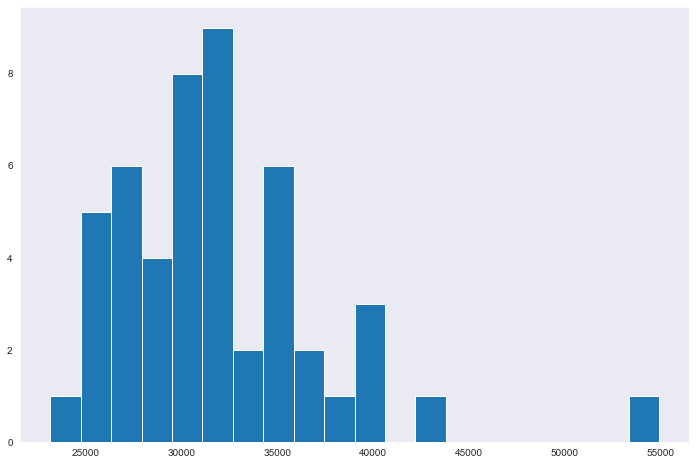

time: 303 ms


In [305]:
plt.figure(figsize = (12, 8))
plt.hist(cluster_sims, bins = 20)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2015-07-02,87106,85142,84173,82404,77086,71479,67323,64587,62873,62138,...,76123,78943,81634,83930,86153,88073,89456,90025,89977,88840
2015-07-03,86617,84035,82697,80747,75547,69890,65701,62852,60966,59757,...,69386,73575,76766,79045,80973,82617,83892,84849,85395,84955
2015-07-04,83036,80300,78827,77143,73104,68519,64265,61292,59282,58046,...,65163,69930,73838,76903,78837,80112,81067,81992,82468,82044
2015-07-05,80122,77235,75163,73266,70980,67902,63897,60809,58759,57506,...,65280,70697,75485,79724,83357,86119,88217,89997,91034,90976
2015-07-06,89452,87034,85840,83864,78545,72845,68584,65545,63804,63297,...,82152,86928,91549,95720,99066,101417,102825,103393,103568,102585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,92775,90158,87435,84779,80241,75376,71881,68623,66457,65049,...,70598,74987,78882,82403,85428,87714,89482,90820,92175,92660
2020-06-28,91528,88612,85261,82431,78280,73872,70150,66795,64446,62600,...,68517,73430,78632,83308,87021,89960,92379,94583,96385,97033
2020-06-29,95663,92461,89116,86268,81981,77225,73136,69493,67667,66837,...,81965,86656,91145,95283,98608,100928,102091,102233,102332,101735


time: 27 ms


In [387]:
dset = df_clusters
dset["date_time"] = df_date[("date_time", 0)]
dset["year"] = dset["date_time"].dt.year
dset["day"] = dset["date_time"].dt.dayofyear
dset = dset.reset_index()
dset = dset.melt(id_vars=["year", "day"])
dset = dset.loc[dset["variable"] == "cluster"]
dset.drop("variable", axis=1, inplace=True)
dset.rename(columns = {"value":"cluster"}, inplace=True)
dset = dset.pivot(index="year", columns="day", values="cluster")
dset

C:\Users\jimpg\AppData\Local\Temp/ipykernel_1308/2417498832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dset["date_time"] = df_date[("date_time", 0)]
C:\Users\jimpg\AppData\Local\Temp/ipykernel_1308/2417498832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dset["year"] = dset["date_time"].dt.year
C:\Users\jimpg\AppData\Local\Temp/ipykernel_1308/2417498832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

day,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
year,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,30,33,29,30,28,20,20,20,NaN
2016,11,11,11,2,41,12,20,20,17,38,...,2,20,30,33,29,28,20,8,20,11
2017,16,30,28,45,6,6,40,40,6,2,...,8,8,43,2,6,40,40,45,41,NaN
2018,22,22,22,22,22,40,41,2,2,15,...,11,11,33,35,17,17,8,43,17,NaN
2019,30,38,15,15,43,16,28,17,38,12,...,37,11,33,39,9,16,33,0,20,NaN
2020,11,17,17,11,11,27,20,2,15,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 75 ms


In [370]:
# NOTE: 1 = WINTER, 2 = SPRING, 3 = SUMMER, 4 = FALL
# NOTE: Monday = 0
def day_type(season, weekday):
    # Weekdays
    if weekday < 5:
        return season
    # Weekends
    else:
        return season + 4

time: 1.02 ms


In [385]:
df_clusters["day type"] = df_clusters["season"]
df_clusters.loc[df_clusters["weekday"] >= 5, "day type"] = 4 + df_clusters["season"]
df_clusters

C:\Users\jimpg\AppData\Local\Temp/ipykernel_1308/2155078476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters["day type"] = df_clusters["season"]
C:\Users\jimpg\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,cluster,weekday,season,date_time,year,day,day type
date,,,,,,,
2015-07-02,7,3,3,2015-07-02,2015,183,3
2015-07-03,4,4,3,2015-07-03,2015,184,3
2015-07-04,25,5,3,2015-07-04,2015,185,7
2015-07-05,25,6,3,2015-07-05,2015,186,7
2015-07-06,14,0,3,2015-07-06,2015,187,3
...,...,...,...,...,...,...,...
2020-06-27,42,5,3,2020-06-27,2020,179,7
2020-06-28,26,6,3,2020-06-28,2020,180,7
2020-06-29,14,0,3,2020-06-29,2020,181,3


time: 25 ms


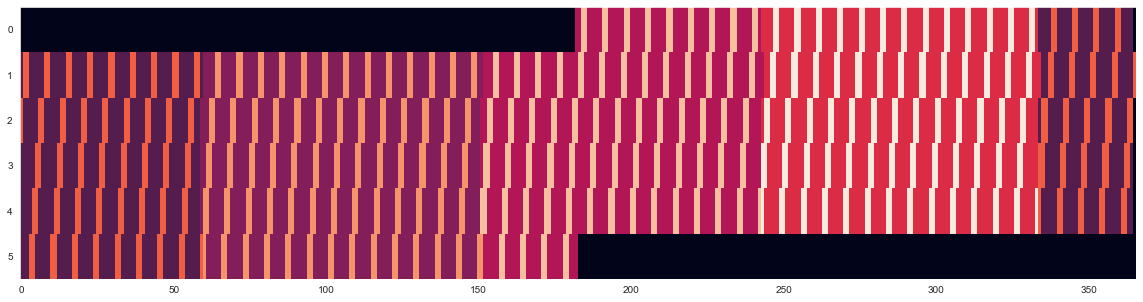

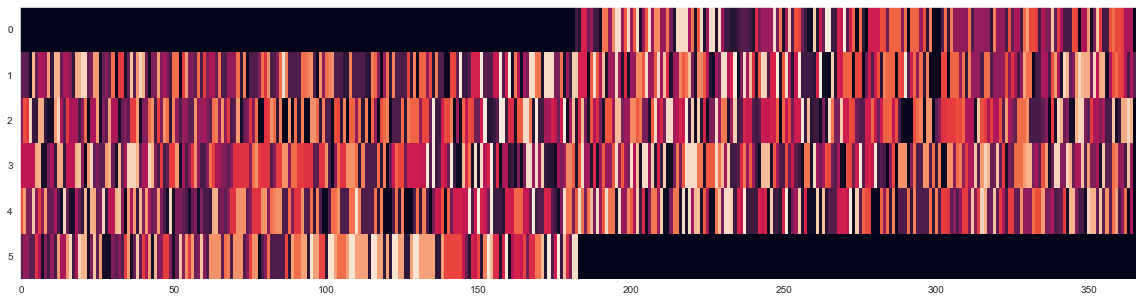

time: 636 ms


In [389]:
day_type = df_clusters[["day type", "year", "day"]]
day_type = day_type.pivot(index = "year", columns = "day", values = "day type")
day_type.fillna(-1, inplace=True)

plt.figure(figsize=(20, 5))
plt.imshow(day_type, aspect='auto')

dset.fillna(-1, inplace=True)
plt.figure(figsize=(20, 5))
plt.imshow(dset, aspect='auto')